# Document principal du projet

## 1- Création de la base de données


On se sert directement du fichier *src/services/init/initialisation.json*. Ce fichier contient une liste de codes-barres que l'on utilise pour instancier la base de données *src/database/barcodes.json*.

On doit d'abord s'assurer d'être au bon endroit et d'avoir le bon *working directory*, à savoir : *Projet-python-pour-la-data-science---ENSAE-Paris*.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def set_working_directory(target_dir_name):
    current_dir = os.getcwd()
    
    while os.path.basename(current_dir) != target_dir_name:
        parent_dir = os.path.dirname(current_dir)
        # Si on atteint la racine sans trouver le dossier cible, on arrête pour éviter une boucle infinie
        if current_dir == parent_dir:  
            raise FileNotFoundError(f"Le dossier cible '{target_dir_name}' n'a pas été trouvé dans l'arborescence.")
        current_dir = parent_dir  # Remonter d'un niveau

    os.chdir(current_dir)
    print(f"Le working directory est maintenant : {os.getcwd()}")

# Exemple d'utilisation
try:
    set_working_directory("Projet-python-pour-la-data-science---ENSAE-Paris")
except FileNotFoundError as e:
    print(e)


Le working directory est maintenant : c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris


On importe ensuite la class **Barcodes** puis on l'initialise. 

In [3]:
from src.services.barcodes import Barcodes
import os

# On instancie la base de données si cela n'a pas déjà été fait
bar = Barcodes()
bar.initialiser_database()

Une fois que cela a été fait, on peut désormais créer une nouvelle catégorie, appelée **categorie_clean**, celle-ci permet de regrouter différents produits qui ont des caractéristiques communes. Ensuite, on peut afficher un aperçu de la base de données (BDD).

In [4]:
from src.services.traitement import Traitement
# Création d'une instance
traitement = Traitement()

# On récupère de DataFrame
data = traitement.df

# Affichage des données transformées
print(f"Nom des colonnes :\n{[name for name in data.columns]}")
print('-'*60 + '\n')
print("Les 2 premières lignes de la BDD")
print(data.head(2))

Nom des colonnes :
['Nom', 'Nutriscore', 'Ecoscore', 'Taux de sel (100g)', 'Taux de matieres grasses (100g)', 'Taux de matieres grasses saturees (100g)', 'Taux de proteine (100g)', 'Taux de sucre (100g)', 'Energie (Kcal) (100g)', 'Categorie_clean']
------------------------------------------------------------

Les 2 premières lignes de la BDD
                                   Nom Nutriscore  Ecoscore  \
Barcode                                                       
3073781055016        Fagotin tradition          d      47.0   
3564707128117  Ricotta bio 8% Mat. Gr.          c      60.0   

               Taux de sel (100g)  Taux de matieres grasses (100g)  \
Barcode                                                              
3073781055016                 1.4                             28.0   
3564707128117                 0.4                              8.0   

               Taux de matieres grasses saturees (100g)  \
Barcode                                                   
3073

On peut également vérifier que les variables sont du bon type.

In [5]:
print(data.dtypes)

Nom                                          object
Nutriscore                                   object
Ecoscore                                    float64
Taux de sel (100g)                          float64
Taux de matieres grasses (100g)             float64
Taux de matieres grasses saturees (100g)    float64
Taux de proteine (100g)                     float64
Taux de sucre (100g)                        float64
Energie (Kcal) (100g)                       float64
Categorie_clean                              object
dtype: object


## 2- Statistiques sur la BDD

Nous allons dans cette partie nous occuper de réaliser des statistiques sur la BDD afin de mieux comprendes la répartition des différentes variables et leurs interactions. Cela pourra alors motiver l'uilisation de modèle prédictif dans la section qui suit.

Commençons par importer la classe qui nous permettra de réaliser toutes les statistiques :

In [6]:
from src.services.stats import Statistiques
stats = Statistiques()
data = Statistiques().df

### a) Statistiques descriptives univariées

On peut commencer par s'intéresser aux moyennes et aux écarts-types de chaque colonne si elles sont numériques ou alors à leur histogramme sinon.

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

numeric_columns =[
            'Taux de sel (100g)', 'Taux de matieres grasses (100g)',
            'Taux de matieres grasses saturees (100g)',
            'Taux de proteine (100g)', 'Taux de sucre (100g)',
            'Energie (Kcal) (100g)', 'Ecoscore'
            ]

for i in range(len(numeric_columns)):
    print(f"{numeric_columns[i]} | Moyenne : {data[numeric_columns].mean()[i]} | Ecart-type : {data[numeric_columns].std()[i]}\n")


Taux de sel (100g) | Moyenne : 0.8438285425328783 | Ecart-type : 1.5169115389130872

Taux de matieres grasses (100g) | Moyenne : 18.45385989529618 | Ecart-type : 24.274611164839822

Taux de matieres grasses saturees (100g) | Moyenne : 5.640983802009041 | Ecart-type : 8.132544343566297

Taux de proteine (100g) | Moyenne : 7.46982068604887 | Ecart-type : 7.432534868424288

Taux de sucre (100g) | Moyenne : 14.34101170224255 | Ecart-type : 20.605046482495048

Energie (Kcal) (100g) | Moyenne : 316.9029693897519 | Ecart-type : 218.5231187557194

Ecoscore | Moyenne : 50.188976377952756 | Ecart-type : 26.913330374447856



On peut ensuite regarder la moyenne dans chaque groupe de '*Categorie_clean*'

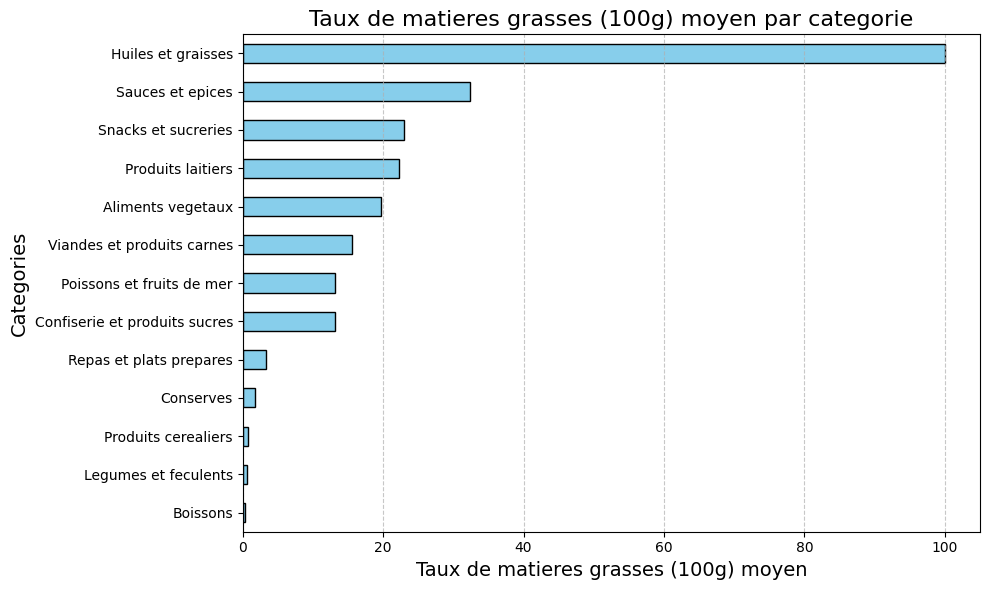

In [59]:
stats.moy_par_categorie('Taux de matieres grasses (100g)')

On s'intéresse ensuite aux données en elles-mêmes : est-ce qu'il y a beaucoup de *NA* ou non ?

In [43]:
na_par_variable = data.apply(lambda x: x.isna().sum()).sort_values(ascending=False)
print(na_par_variable)
print('-'*60)
print(f"Nombre total d'obsevations {len(data)}")

Ecoscore                                    78
Taux de sel (100g)                          51
Energie (Kcal) (100g)                       45
Taux de matieres grasses saturees (100g)    39
Taux de sucre (100g)                        37
Taux de matieres grasses (100g)             35
Taux de proteine (100g)                     33
Categorie_clean                              5
Nutriscore                                   0
Nom                                          0
dtype: int64
------------------------------------------------------------
Nombre total d'obsevations 459


Il manque beaucoup d'Ecoscores notamment.

c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\stats.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=filtered_df['Categorie_clean'], y=self.df[variable], palette="Set3")


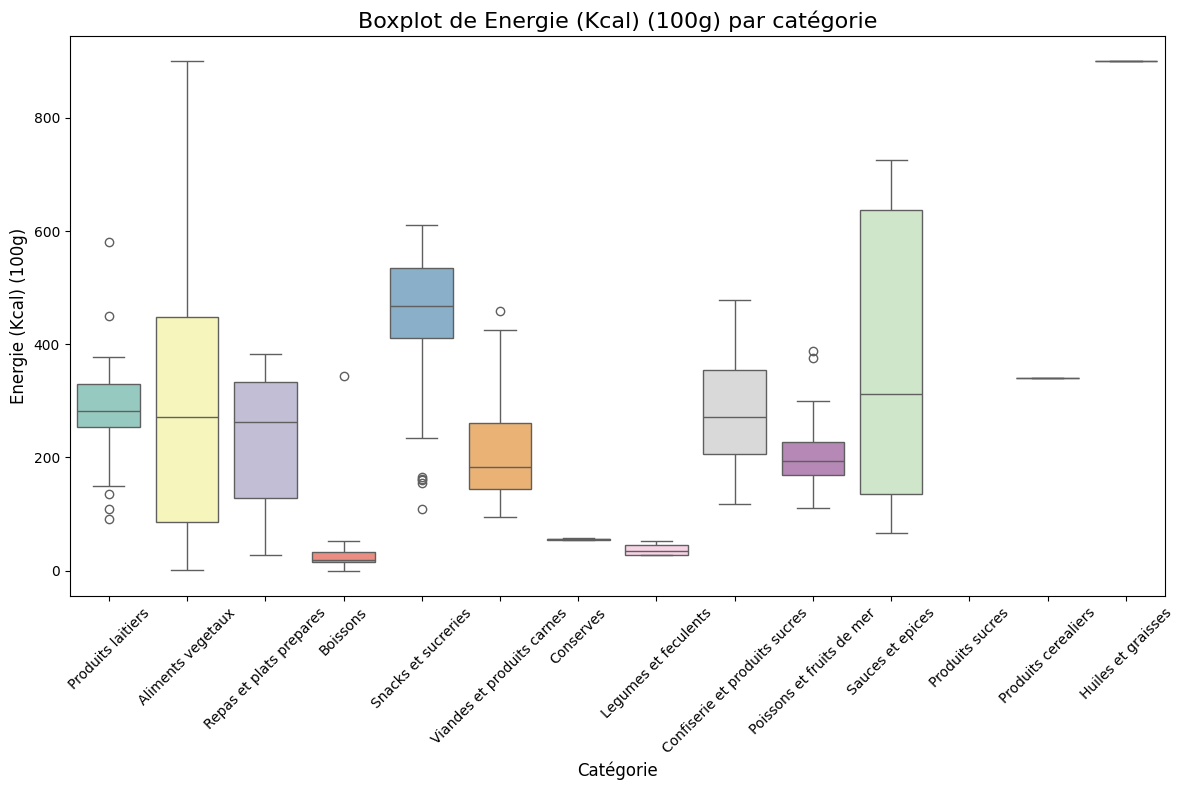

In [7]:
stats.boxplot_categorie("Energie (Kcal) (100g)")

Cela explique le fait qu'il y ait des boxplots plats. On peut donc réappliquer la méthode avec cette fois-ci l'atribut *'few_obs'* qui nous permet de rentrer le nombre minimal d'observations à avoir dans une catégorie pour réaliser le boxplot.

On ne va garder que les catégories qui contiennent au moins 5 observations.

c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\stats.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=filtered_df['Categorie_clean'], y=self.df[variable], palette="Set3")


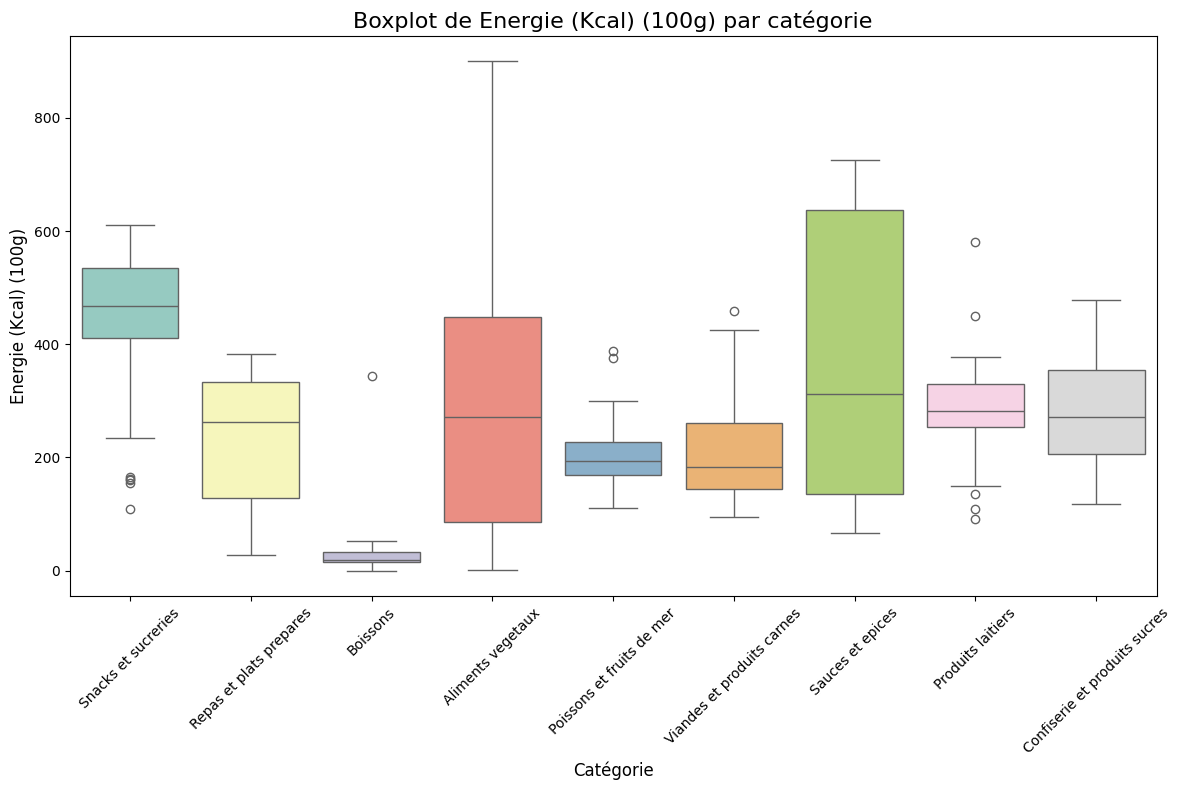

In [8]:
stats.boxplot_categorie("Energie (Kcal) (100g)", 5)

Qu'en est-il pour les données catégorielles ?

Nom                                          object
Nutriscore                                   object
Ecoscore                                    float64
Taux de sel (100g)                          float64
Taux de matieres grasses (100g)             float64
Taux de matieres grasses saturees (100g)    float64
Taux de proteine (100g)                     float64
Taux de sucre (100g)                        float64
Energie (Kcal) (100g)                       float64
Categorie_clean                              object
dtype: object


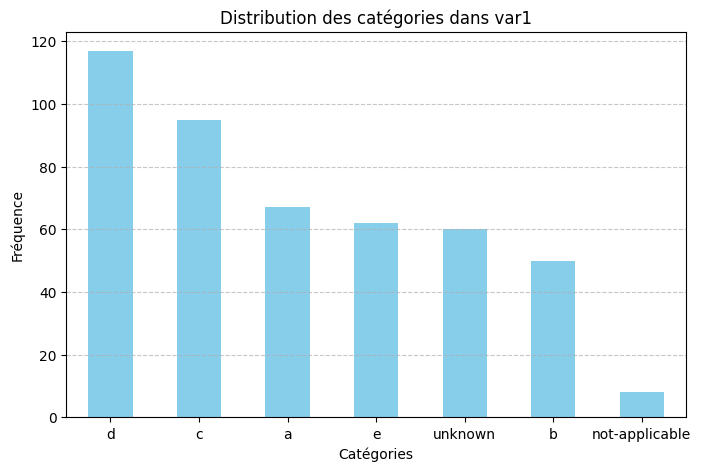

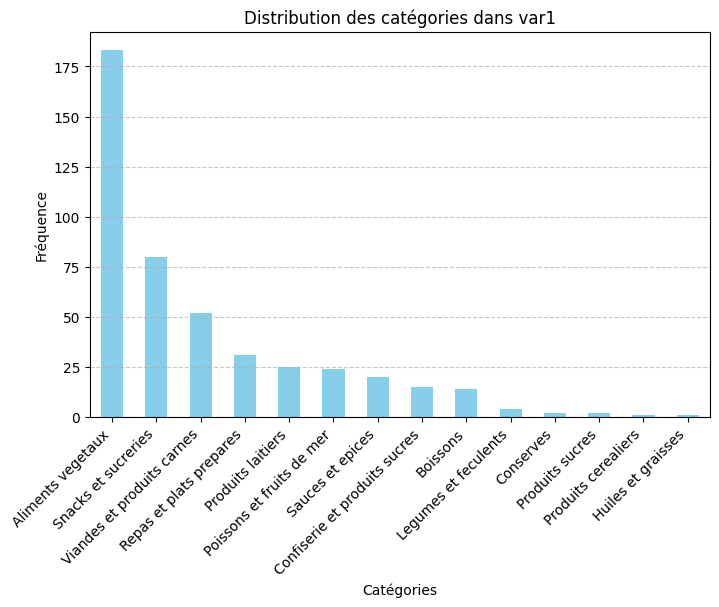

In [57]:
print(data.dtypes)
# Compter les occurrences de chaque catégorie
counts_nutriscore = data['Nutriscore'].value_counts()
counts_Categorie_clean = data['Categorie_clean'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(8, 5))
counts_nutriscore.plot(kind='bar', color='skyblue')
plt.title('Distribution des catégories dans var1')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Créer un graphique en barres
plt.figure(figsize=(8, 5))
counts_Categorie_clean.plot(kind='bar', color='skyblue')
plt.title('Distribution des catégories dans var1')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### b) Statistiques descriptives multivariées

On souhaite désormais s'intéresser à la covariance entre les variables deux à deux. On peut pour ce faire regarder la matrice des covariances.

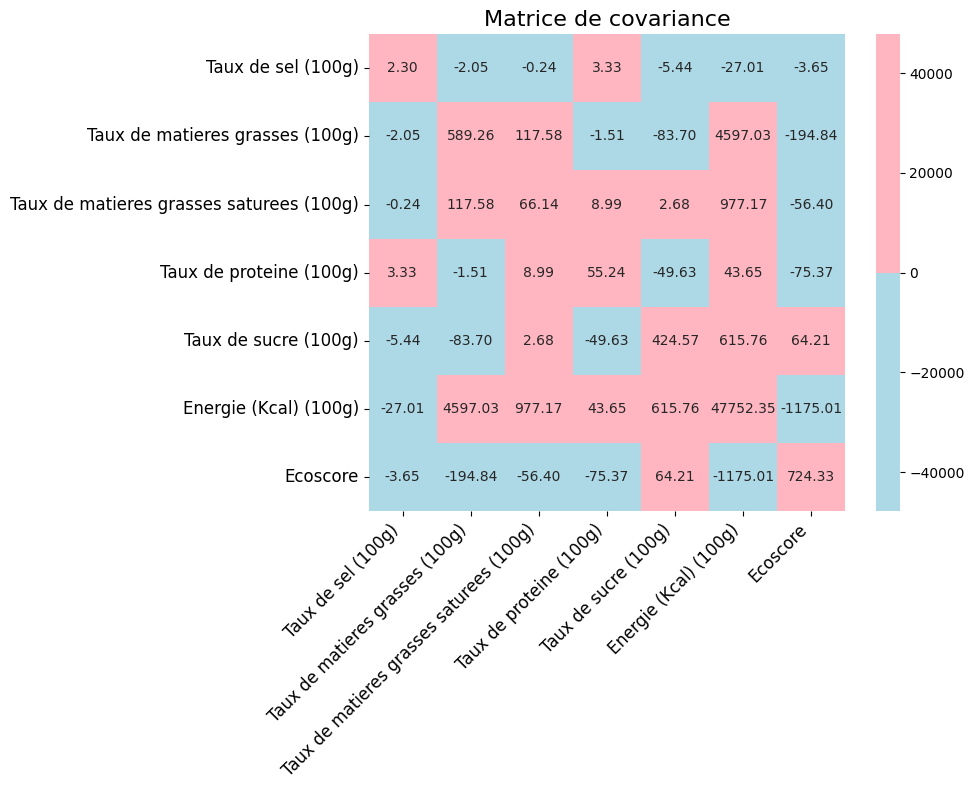

,Taux de sel (100g),Taux de matieres grasses (100g),Taux de matieres grasses saturees (100g),Taux de proteine (100g),Taux de sucre (100g),Energie (Kcal) (100g),Ecoscore
Taux de sel (100g),2.301021,-2.052910,-0.238061,3.331760,-5.437397,-27.006958,-3.650529
Taux de matieres grasses (100g),-2.052910,589.256747,117.577532,-1.514835,-83.698133,4597.025243,-194.843998
Taux de matieres grasses saturees (100g),-0.238061,117.577532,66.138278,8.985342,2.684810,977.172688,-56.401259
Taux de proteine (100g),3.331760,-1.514835,8.985342,55.242575,-49.633931,43.647168,-75.371902
Taux de sucre (100g),-5.437397,-83.698133,2.684810,-49.633931,424.567941,615.764325,64.206658
Energie (Kcal) (100g),-27.006958,4597.025243,977.172688,43.647168,615.764325,47752.353431,-1175.007411
Ecoscore,-3.650529,-194.843998,-56.401259,-75.371902,64.206658,-1175.007411,724.327352


In [58]:
stats.stats_covariances()


TODO -> commenter

## 3- Modèle prédictifs

### a) Modèle 1

### b) Modèle 2